In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

In [2]:
df = pd.read_csv(r'D:\Courses\Data-Science_Tech\INeuron_Courses\MACHING_LEARNING_LIVE-CLASS\PROJECT\ML_CODE\ML_Live_Class\data\heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.describe() #Descriptive stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum() # no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

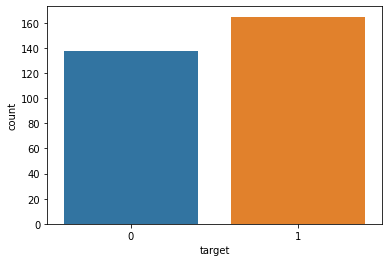

In [7]:
sns.countplot(x='target',data=df) #More or less balanced classes in the dataset

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

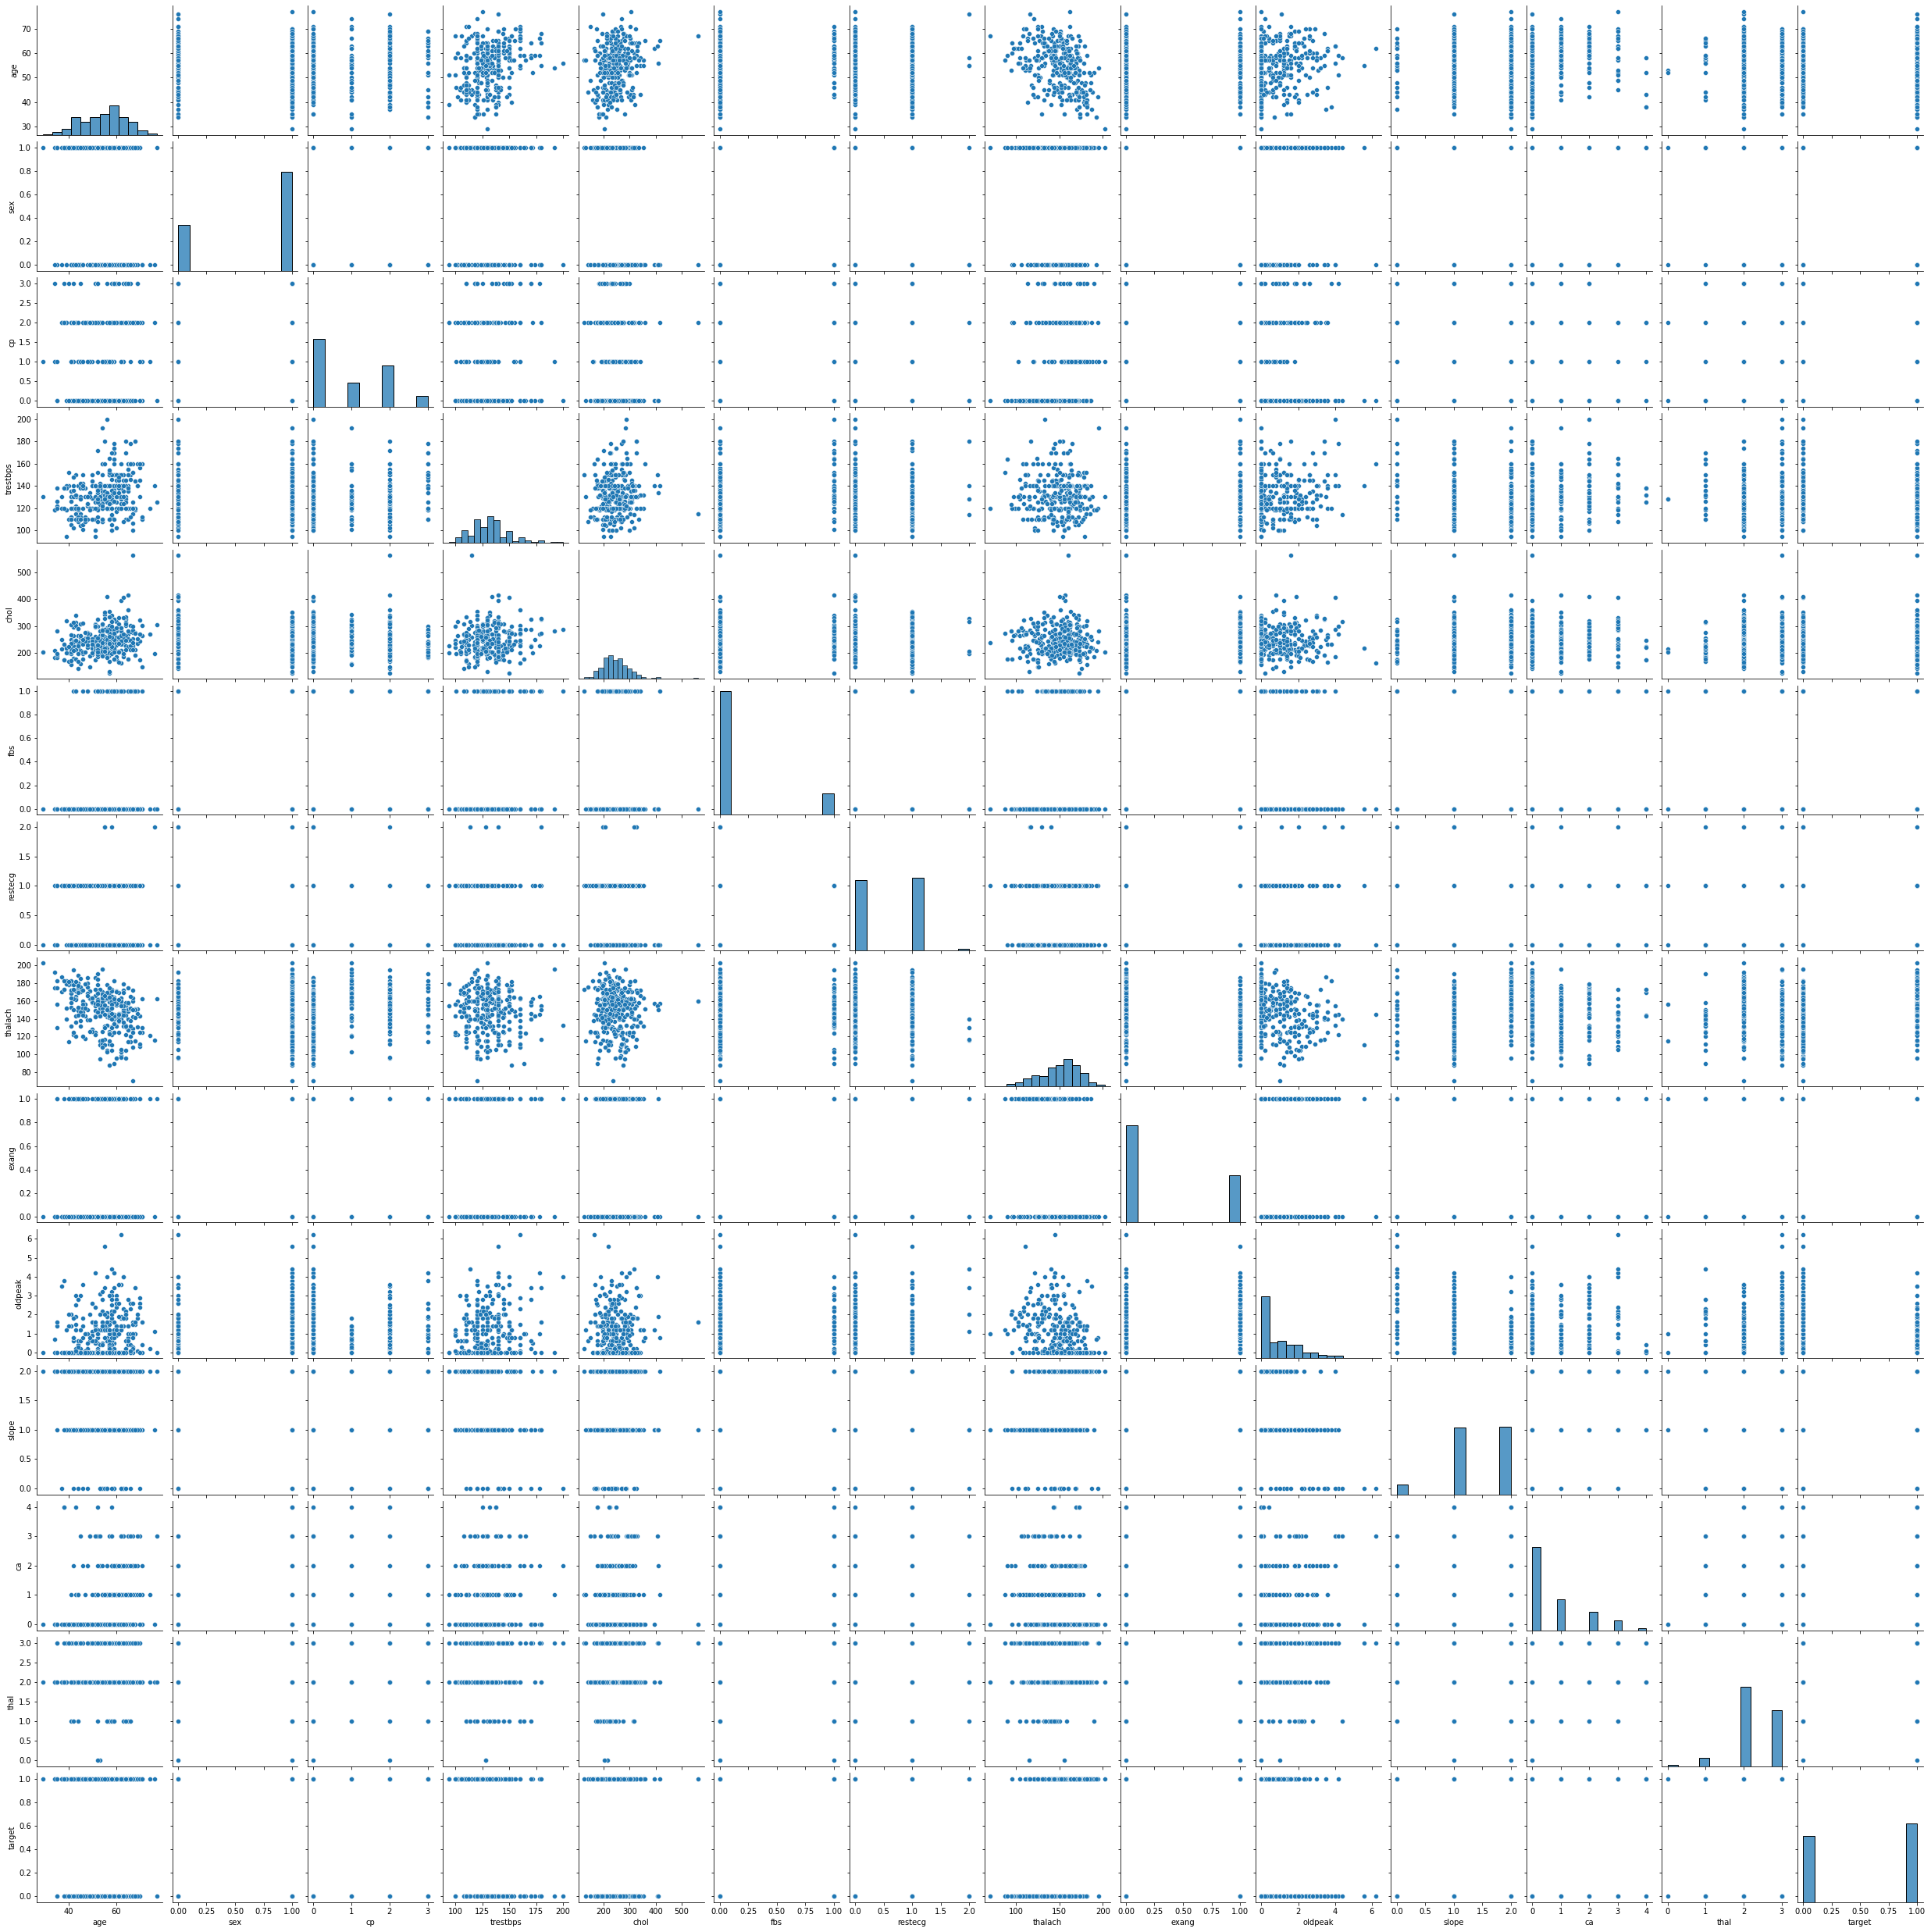

In [11]:
# correlation with pairplot

#sns.pairplot(df)

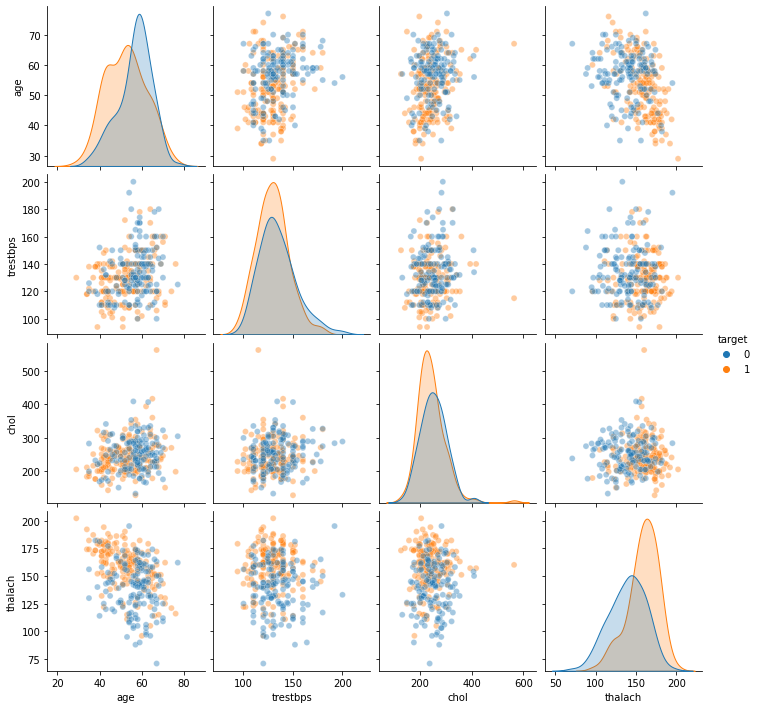

In [18]:
sns.pairplot(data = df[['age','trestbps','chol', 'thalach','target']],hue='target',plot_kws={'alpha':0.4})

<AxesSubplot:>

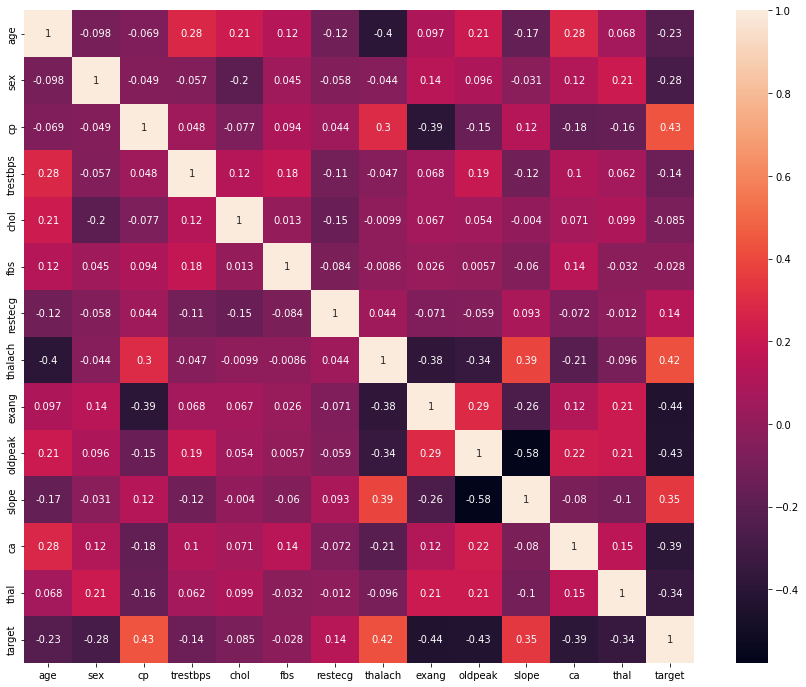

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot = True)

### Train test split

In [21]:
X = df.drop('target',axis=1)
y = df['target']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0,shuffle=True)



In [24]:
print(X_train.shape)
print(X_test.shape)

(227, 13)
(76, 13)


In [27]:
# Scaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = LogisticRegressionCV()

model.fit(X_train_scaled,y_train)

LogisticRegressionCV()

In [30]:
model.Cs_ # C/Regularization value

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [31]:
model.C_ #best C value

array([0.00599484])

In [32]:
model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [33]:
model.coef_

array([[-0.05895769, -0.15331512,  0.1766883 , -0.04459788, -0.02228696,
        -0.02706873,  0.02296292,  0.14312142, -0.1621505 , -0.15100847,
         0.10189253, -0.16710779, -0.1169105 ]])

In [34]:
coefs = pd.Series(data=model.coef_[0],index=X.columns)
coefs

age        -0.058958
sex        -0.153315
cp          0.176688
trestbps   -0.044598
chol       -0.022287
fbs        -0.027069
restecg     0.022963
thalach     0.143121
exang      -0.162151
oldpeak    -0.151008
slope       0.101893
ca         -0.167108
thal       -0.116910
dtype: float64

<AxesSubplot:>

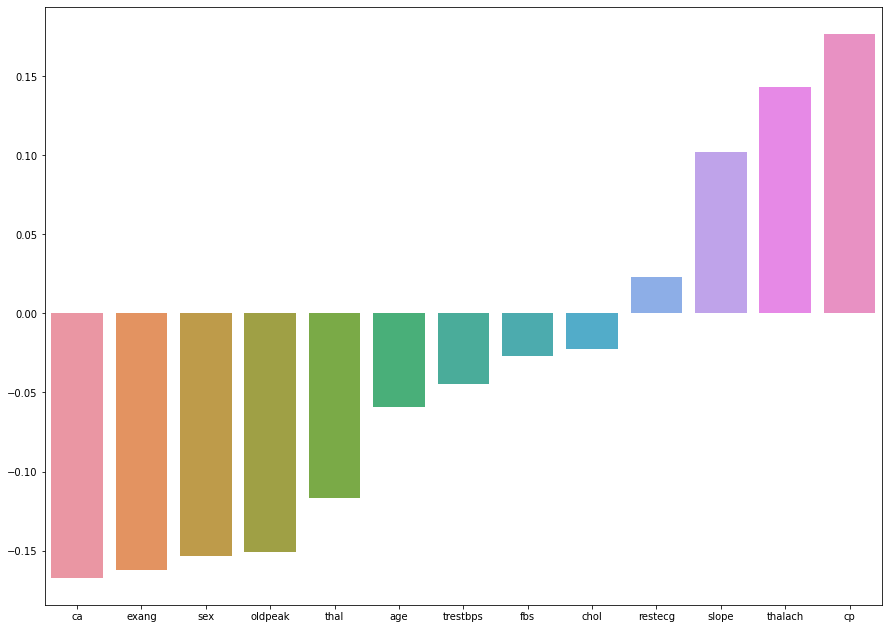

In [37]:
coefs = coefs.sort_values()
plt.figure(figsize = (15,11))
sns.barplot(x = coefs.index,y = coefs.values)

In [40]:
# Performance Metrics

y_pred = model.predict(X_test_scaled)

In [41]:
confusion_matrix(y_test,y_pred)

array([[20, 13],
       [ 2, 41]], dtype=int64)

In [43]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.76      0.95      0.85        43

    accuracy                           0.80        76
   macro avg       0.83      0.78      0.79        76
weighted avg       0.82      0.80      0.79        76



C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


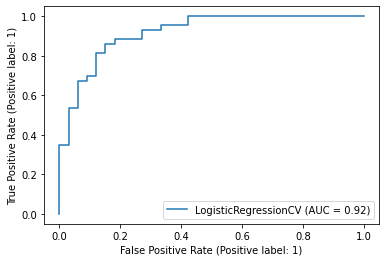

In [44]:
plot_roc_curve(model,X_test_scaled,y_test)

C:\Users\SREEKANTH\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


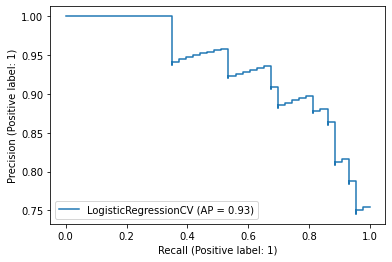

In [45]:
plot_precision_recall_curve(model,X_test_scaled,y_test)